# Developers Hub Corporation

## Huzaifa Asif Ali

## DHC-1984

## Data Science & Analytics Internship Tasks

# Task 1: Term Deposit Subscription Prediction (Bank Marketing)

In [52]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [39]:
col = df.select_dtypes('object').columns
col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [40]:
le = LabelEncoder()
for i in col:
    df[i] = le.fit_transform(df[i])

In [41]:
df.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
deposit      int32
dtype: object

In [42]:
X = df.drop('deposit', axis=1)
y = df['deposit']

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=33,random_state=42)

In [44]:
lo = LogisticRegression(max_iter=10000)
lo.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [47]:
y_pred = lo.predict(X_test)

In [48]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[13,  6],
       [ 2, 12]], dtype=int64)

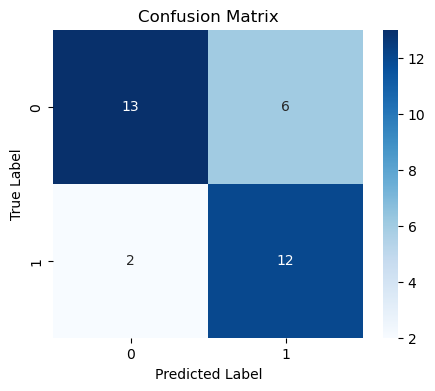

In [53]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [55]:
from sklearn.metrics import f1_score
f1=f1_score(Y_test,y_pred)
f1

0.75

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_prob = lo.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.7857142857142857


In [46]:
Rf = RandomForestClassifier()
Rf.fit(X_train,Y_train)

RandomForestClassifier()

In [60]:
y_pred1 = Rf.predict(X_test)

In [61]:
cm = confusion_matrix(Y_test,y_pred1)
cm

array([[14,  5],
       [ 0, 14]], dtype=int64)

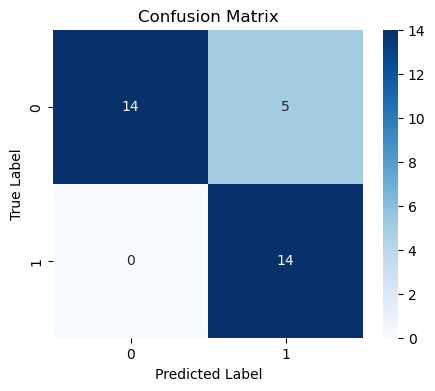

In [62]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [64]:
from sklearn.metrics import f1_score
f1=f1_score(Y_test,y_pred1)
f1

0.8484848484848485

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_prob = Rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.8984962406015038


In [66]:
pip install shap scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [72]:
import shap
explainer = shap.TreeExplainer(Rf)
shap_values = explainer.shap_values(X_test)
shap_values

array([[[-2.09939989e-01,  2.09939989e-01],
        [-6.29569937e-03,  6.29569937e-03],
        [-5.97988636e-03,  5.97988636e-03],
        ...,
        [ 3.13143494e-02, -3.13143494e-02],
        [ 1.93622553e-02, -1.93622553e-02],
        [ 1.42346909e-04, -1.42346909e-04]],

       [[ 1.14793346e-02, -1.14793346e-02],
        [ 2.91809501e-03, -2.91809501e-03],
        [ 1.05212724e-02, -1.05212724e-02],
        ...,
        [ 1.97192997e-02, -1.97192997e-02],
        [ 7.41001307e-03, -7.41001307e-03],
        [-8.92947243e-04,  8.92947243e-04]],

       [[ 1.30650298e-02, -1.30650298e-02],
        [ 2.09196841e-02, -2.09196841e-02],
        [-1.07887159e-03,  1.07887159e-03],
        ...,
        [ 6.26638126e-03, -6.26638126e-03],
        [-4.14557164e-03,  4.14557164e-03],
        [ 3.64648051e-02, -3.64648051e-02]],

       ...,

       [[-4.29239277e-03,  4.29239277e-03],
        [-3.65380054e-03,  3.65380054e-03],
        [ 1.74424514e-02, -1.74424514e-02],
        ...,
     

In [71]:
X_explain = X_test.iloc[:5]
shap_values_5 = explainer.shap_values(X_explain)
print(shap_values_5)

[[[-2.09939989e-01  2.09939989e-01]
  [-6.29569937e-03  6.29569937e-03]
  [-5.97988636e-03  5.97988636e-03]
  [ 1.10564324e-02 -1.10564324e-02]
  [-1.47180648e-04  1.47180648e-04]
  [-1.30101817e-02  1.30101817e-02]
  [-3.77939496e-02  3.77939496e-02]
  [-9.19062588e-03  9.19062588e-03]
  [-6.46581642e-02  6.46581642e-02]
  [ 2.03852208e-03 -2.03852208e-03]
  [ 7.05925532e-03 -7.05925532e-03]
  [ 8.15114964e-02 -8.15114964e-02]
  [-1.08585040e-02  1.08585040e-02]
  [ 3.13143494e-02 -3.13143494e-02]
  [ 1.93622553e-02 -1.93622553e-02]
  [ 1.42346909e-04 -1.42346909e-04]]

 [[ 1.14793346e-02 -1.14793346e-02]
  [ 2.91809501e-03 -2.91809501e-03]
  [ 1.05212724e-02 -1.05212724e-02]
  [-1.56637985e-04  1.56637985e-04]
  [ 1.92226534e-05 -1.92226534e-05]
  [-2.87850835e-02  2.87850835e-02]
  [-6.50285562e-04  6.50285562e-04]
  [-2.42620694e-04  2.42620694e-04]
  [ 1.23877284e-01 -1.23877284e-01]
  [-3.60384761e-03  3.60384761e-03]
  [-2.19165658e-02  2.19165658e-02]
  [-4.59942838e-01  4.5994

# Task 2 Customer Segmentation Using Unsupervised Learning

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("Mall Customers.xlsx")
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


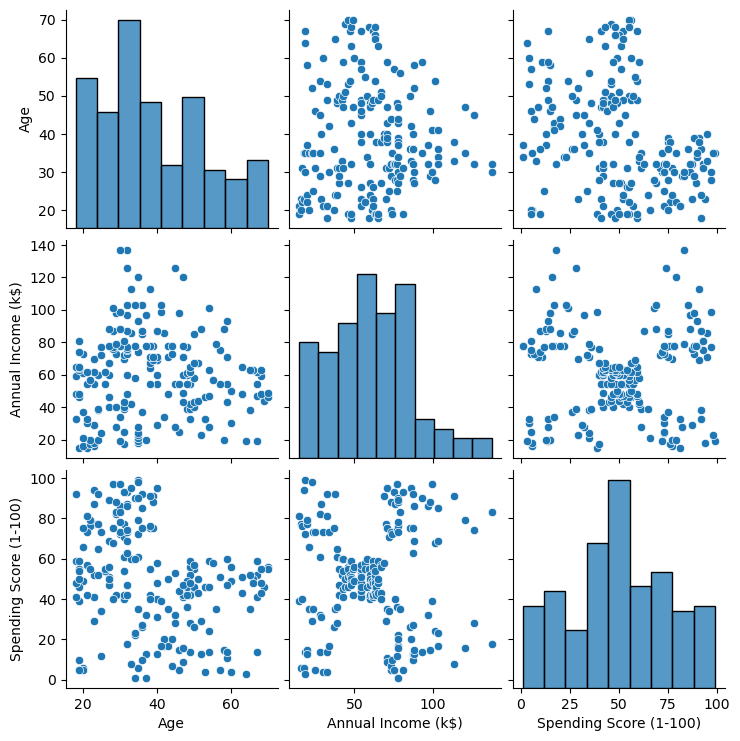

In [4]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.cluster import KMeans
kmeans = KMeans(
    n_clusters=5,
    random_state=42,
    n_init=10
)
df['Cluster'] = kmeans.fit_predict(X_scaled)


G:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


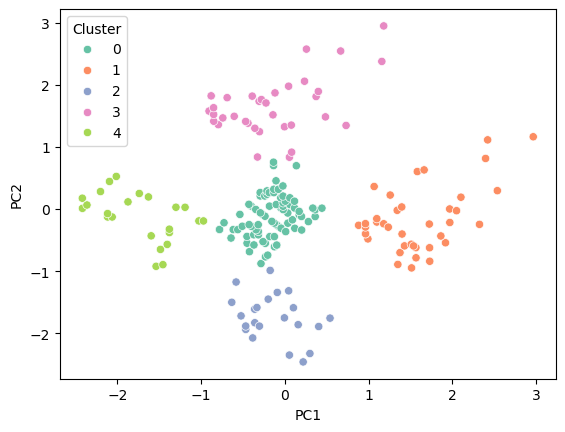

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.show()

# Task 4: Loan Default Risk with Business Cost Optimization

In [24]:
df4 = pd.read_csv("german_credit_data.csv")
df4.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [25]:
df4.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [26]:
df4['Saving accounts'] = df4['Saving accounts'].fillna('unknown')
df4['Checking account'] = df4['Checking account'].fillna('unknown')

In [28]:
df4['Risk'] = df4['Risk'].map({'good': 0, 'bad': 1})

In [29]:
df_encoded = pd.get_dummies(df4, drop_first=True)

In [30]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

y_probs = lr_model.predict_proba(X_test)[:, 1]


In [34]:
import numpy as np

FP_COST = 1
FN_COST = 5
thresholds = np.arange(0.1, 0.9, 0.05)
total_costs = []

for t in thresholds:
    preds = (y_probs >= t).astype(int)
    
    FP = ((preds == 1) & (y_test == 0)).sum()
    FN = ((preds == 0) & (y_test == 1)).sum()
    
    cost = FP * FP_COST + FN * FN_COST
    total_costs.append(cost)

best_threshold = thresholds[np.argmin(total_costs)]
best_threshold


0.25000000000000006

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

final_preds = (y_probs >= best_threshold).astype(int)

cm = confusion_matrix(y_test, final_preds)
print(classification_report(y_test, final_preds))


              precision    recall  f1-score   support

           0       0.90      0.63      0.74       140
           1       0.49      0.83      0.62        60

    accuracy                           0.69       200
   macro avg       0.69      0.73      0.68       200
weighted avg       0.78      0.69      0.70       200



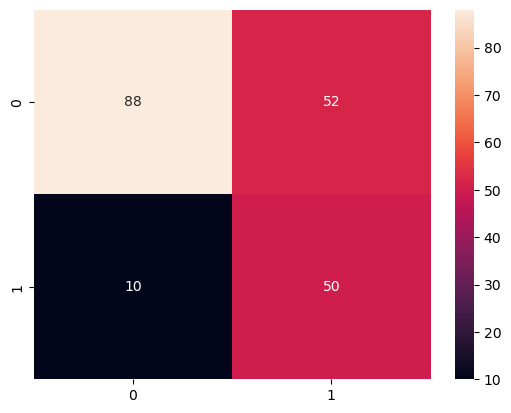

In [38]:
sns.heatmap(cm,annot=True)
plt.show()

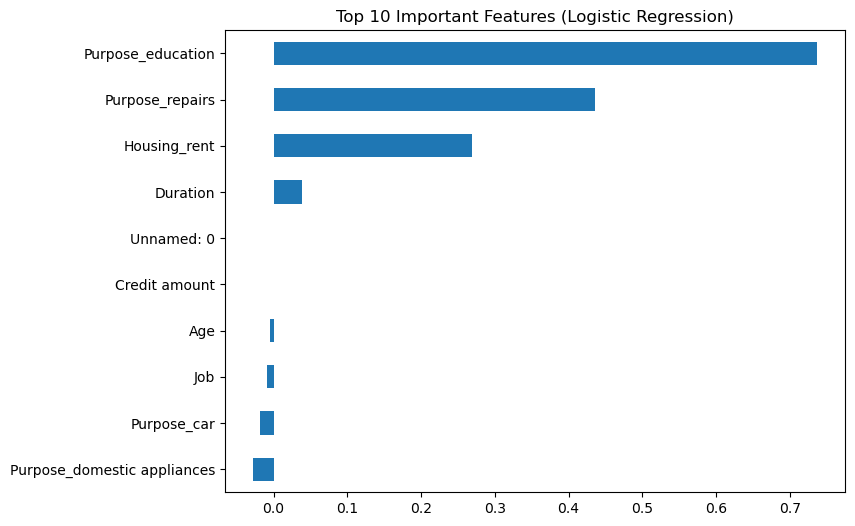

In [39]:
import matplotlib.pyplot as plt

importance = pd.Series(
    lr_model.coef_[0],
    index=X.columns
).sort_values()

plt.figure(figsize=(8,6))
importance.tail(10).plot(kind='barh')
plt.title("Top 10 Important Features (Logistic Regression)")
plt.show()


In [43]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    verbose=0
)

cat_model.fit(X_train, y_train)
cat_probs = cat_model.predict_proba(X_test)[:,1]
cat_probs

array([1.97467272e-01, 1.64922907e-01, 1.93389128e-01, 3.20694587e-01,
       3.09041173e-01, 2.78026305e-01, 2.71984005e-01, 1.26317572e-01,
       2.02542941e-02, 2.93913034e-01, 1.20626770e-02, 6.04816911e-01,
       4.72765618e-04, 1.56471084e-01, 7.78552536e-01, 1.93950602e-02,
       6.66252985e-01, 4.30297147e-03, 5.08607346e-02, 6.86194810e-03,
       1.92861783e-02, 5.21274792e-02, 5.55645124e-03, 8.30359958e-01,
       2.73885573e-01, 2.48681237e-01, 2.62346736e-03, 1.37938377e-01,
       8.78911164e-02, 5.27785097e-03, 5.18430169e-03, 2.64948633e-02,
       1.20891010e-02, 8.92271761e-01, 2.22712627e-02, 8.85875542e-01,
       5.81129784e-01, 7.98600466e-01, 2.56900290e-02, 5.65862535e-01,
       1.59824343e-01, 3.76059446e-01, 1.62786365e-01, 1.31905048e-01,
       5.84788475e-01, 3.79817517e-02, 9.76074573e-01, 7.84284720e-01,
       2.26810934e-02, 5.99492497e-02, 5.79855742e-03, 3.81303422e-02,
       2.56523016e-01, 4.70849064e-01, 7.18472627e-01, 2.58909743e-01,
      

# Task 5: Interactive Business Dashboard (Streamlit)

In [57]:
import streamlit as st
import pandas as pd

# -------------------
# Load Dataset
# -------------------
@st.cache_data
def load_data():
    # Make sure to update the path to your CSV
    df = pd.read_csv("Global_Superstore2.csv", encoding='ISO-8859-1')
    # Convert numeric columns
    df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
    df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
    df.dropna(subset=['Sales', 'Profit'], inplace=True)
    return df

df = load_data()

st.title("📊 Global Superstore Dashboard - KPIs")

# -------------------
# Total Sales & Profit
# -------------------
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

col1, col2 = st.columns(2)
col1.metric("Total Sales", f"${total_sales:,.0f}")
col2.metric("Total Profit", f"${total_profit:,.0f}")

# -------------------
# Top 5 Customers by Sales
# -------------------
st.subheader("Top 5 Customers by Sales")
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5)

st.bar_chart(top_customers)

# Optional: Show the table for reference
st.subheader("Top Customers Table")
st.dataframe(top_customers)


2025-12-30 20:47:02.822 No runtime found, using MemoryCacheStorageManager
2025-12-30 20:47:02.827 No runtime found, using MemoryCacheStorageManager


FileNotFoundError: [Errno 2] No such file or directory: 'Global_Superstore2.csv'